# Image Classification using Convolution Neural Network
\
**Requirements for the setup**


*   Train Dataset: Train Dataset should contain atleast 150 images.
*   Validation Dataset: This dataset is used to determine the val_efficiency of the neural network.
*   Type of Neural Network: We are using Convolution Neural Network.

**We will start the following project with following setup:**


*   Import all the modules of Keras, Scipy and PIL. Since we are working on Goggle Colab, the below machine will need a GPU for faster process. 
*   A Train dataset and a Validation dataset containing the sub-directories of all the images and its types.
*   Each sub-directory should be filled with .jpg or .png images of 10 different types.

**Types of Rings :** 
1. Mens Ring
2. Ladies Heart Ring
3. Ladies Stone Ring
4. Ladies Band Ring
5. Couple Ring

**Types of Pendants:**
1. MangalSutra
2. Pendant Set
3. God Pendant
4. Initial Pendant
5. Stone Pendant

**A total of 10 different types of images are stored in the Train dataset and in the Validation dataset as well.** 

**We will use Convolution Neural Network in order to classify the Images according to the type of ornament.**


**How does this Neural Network Work?**



1.   **Create a Dataset:** In this project, we scrapped images from website "http://jainamgold.com/". A total of 150 images is used in the below assignment.
2.   **Assign Labels:** Here we used ImageDataGenerator package. What this does is it assigns labels to each and every image according to the folder it has been located. 
3.   **VGG16 BottleNeck Features:** Convolutional neural network(CNN) is a powerful tool for image classification. However, it takes many images (on the order of hundreds of thousands) to train a CNN from scratch in order to achieve high accuracy.
4.   **Mapping Keras Labels to Image Classes:** flow_from_directory() just creates batches of the image data to be used for training, validating, and testing. These batches are created according to the sub-directories inside the main folder.
5.   **Convolution Neural Network:** A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.
6.   **Plot the Output:** We used Keras and Matplotlib to generate output of the Convolutuion Neural Network. This helped us to understand the efficiency of the model that was created.


In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
train=ImageDataGenerator(1/255)
validation=ImageDataGenerator(1/255)
test = ImageDataGenerator(1/255)

## Keras VGG16 Application 

The VGG model can be loaded and used in the Keras deep learning library.
Keras provides an Applications interface for loading and using pre-trained models.

Using this interface, you can create a VGG model using the pre-trained weights provided by the Oxford group and use it as a starting point in your own model, or use it as a model directly for classifying images.

In [3]:
from keras import applications
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

datagen = ImageDataGenerator(rescale=1 / 255) 
#needed to create the bottleneck .npy files

58892288/58889256 [==============================] - 0s 0us/step


## Train Dataset

The train data is converted to numpy array and stored in memory for further process in CNN model. This train data is used for the model to train according to vast amount of the the data that is stored in the directory.

In [4]:
generator = datagen.flow_from_directory( 
    "/content/drive/My Drive/Naxbit/CNN/Datagen", 
    target_size=(224, 224), 
    batch_size=50, 
    class_mode=None, 
    shuffle=False) 

nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices)

nb_vad_samples = len(generator.filenames) 
num_classes = len(generator.class_indices)

nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices)

Found 3655 images belonging to 10 classes.


In [ ]:
#Train Bottleneck Features generation
import math
predict_size_train = int(math.ceil(nb_train_samples / 50)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save("/content/drive/My Drive/Naxbit/bottleneck_features_train.npy", bottleneck_features_train)

In [6]:
#Generating Categorical Dataset of Train Data
generator_top = datagen.flow_from_directory( 
   "/content/drive/My Drive/Naxbit/CNN/Datagen", 
   target_size=(224, 224), 
   batch_size=50, 
   class_mode="categorical", 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# Load the bottleneck features saved earlier 
train_data = np.load("/content/drive/My Drive/Naxbit/bottleneck_features_train.npy") 
 
# Get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# Convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 3655 images belonging to 10 classes.


In [9]:
train_labels.shape

(3655, 10)

## Validation

The train data is converted to numpy array and stored in memory for further process in CNN model. This validation data is used for the model to evaluate according to the the data that is stored in the directory.

In [ ]:
generator_vad = datagen.flow_from_directory( 
    "/content/drive/My Drive/Naxbit/CNN/Validation", 
    target_size=(224, 224), 
    batch_size=50, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator_vad.filenames) 
num_classes = len(generator_vad.class_indices) 
 
predict_size_validation = int(math.ceil(nb_validation_samples / 50)) 
 
bottleneck_features_validation = vgg16.predict_generator(generator_vad, predict_size_validation) 
 
np.save("/content/drive/My Drive/Naxbit/bottleneck_features_vad.npy", bottleneck_features_validation)

Found 100 images belonging to 10 classes.


In [10]:
#Validation data
generator_vad = datagen.flow_from_directory( 
   "/content/drive/My Drive/Naxbit/CNN/Validation", 
   target_size=(224, 224), 
   batch_size=50, 
   class_mode="categorical", 
   shuffle=False) 
 
nb_validation_samples = len(generator_vad.filenames) 
num_classes = len(generator_vad.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load("/content/drive/My Drive/Naxbit/bottleneck_features_vad.npy") 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_vad.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 100 images belonging to 10 classes.


In [11]:
validation_labels.shape

(100, 10)

## Test Dataset

The test dataset is used in order to predict the output of the image. And then later you can check whether the generated output is actually correct or not.

In [ ]:
generator_test = datagen.flow_from_directory( 
    "/content/drive/My Drive/Naxbit/Temp/Test", 
    target_size=(224, 224), 
    batch_size=50, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator_test.filenames) 
num_classes = len(generator_test.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / 50)) 
 
bottleneck_features_test = vgg16.predict_generator(generator_test, predict_size_test) 
 
np.save("/content/drive/My Drive/Naxbit/bottleneck_features_test.npy", bottleneck_features_test)

Found 80 images belonging to 10 classes.


In [12]:
#Test data
generator_test = datagen.flow_from_directory( 
   "/content/drive/My Drive/Naxbit/Temp/Test", 
   target_size=(224, 224), 
   batch_size=50, 
   class_mode="categorical", 
   shuffle=False) 
 
nb_test_samples = len(generator_test.filenames) 
num_classes = len(generator_test.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load("/content/drive/My Drive/Naxbit/bottleneck_features_test.npy") 
 
# get the class labels for the training data, in the original order 
test_labels = generator_test.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 80 images belonging to 10 classes.


In [13]:
test_labels.shape

(80, 10)

## Generating Convolution Neural Network Model

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

In [18]:
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation="softmax"))

In [19]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=["acc"])

In [20]:

history = model.fit(train_data, train_labels, 
   epochs=50,
   batch_size=50, 
   validation_data=(validation_data, validation_labels))
model.save_weights("/content/drive/My Drive/Naxbit/model_weights_path.h5")

Epoch 1/50
74/74 [==============================] - 3s 37ms/step - loss: 1.6999 - acc: 0.4257 - val_loss: 1.1401 - val_acc: 0.6300
Epoch 2/50
74/74 [==============================] - 3s 35ms/step - loss: 1.0293 - acc: 0.6668 - val_loss: 0.7131 - val_acc: 0.7700
Epoch 3/50
74/74 [==============================] - 3s 35ms/step - loss: 0.8291 - acc: 0.7283 - val_loss: 0.6303 - val_acc: 0.8100
Epoch 4/50
74/74 [==============================] - 3s 35ms/step - loss: 0.6451 - acc: 0.7943 - val_loss: 0.4860 - val_acc: 0.8300
Epoch 5/50
74/74 [==============================] - 3s 35ms/step - loss: 0.5348 - acc: 0.8364 - val_loss: 0.4062 - val_acc: 0.8400
Epoch 6/50
74/74 [==============================] - 3s 35ms/step - loss: 0.4615 - acc: 0.8523 - val_loss: 0.4792 - val_acc: 0.8100
Epoch 7/50
74/74 [==============================] - 3s 35ms/step - loss: 0.4102 - acc: 0.8720 - val_loss: 0.4647 - val_acc: 0.8000
Epoch 8/50
74/74 [==============================] - 3s 35ms/step - loss: 0.3630 - a

In [21]:

(eval_loss, eval_accuracy) = model.evaluate(validation_data, validation_labels, batch_size=50, verbose=1)
print("Validation Accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("Validation Loss: {}".format(eval_loss)) 

2/2 [==============================] - 0s 7ms/step - loss: 0.8101 - acc: 0.8700
Validation Accuracy: 87.00%
Validation Loss: 0.8101294636726379


## Plotting the Output of the Model

Broadly the methods of Visualizing a CNN model can be categorized into three parts based on their internal workings

*  **Preliminary methods** – Simple methods which show us the overall structure of a trained model.
*  **Activation based methods** – In these methods, we decipher the activations of the individual neurons or a group of neurons to get an intuition of what they are doing.
*  **Gradient based methods** – These methods tend to manipulate the gradients that are formed from a forward and backward pass while training a model.


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2508900   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 2,514,460
Trainable params: 2,514,460
Non-trainable params: 0
____________________________________________

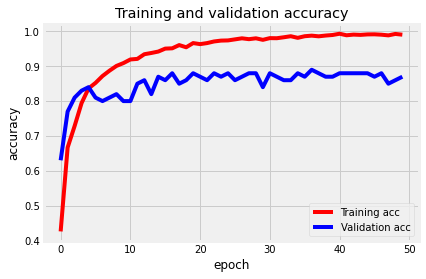

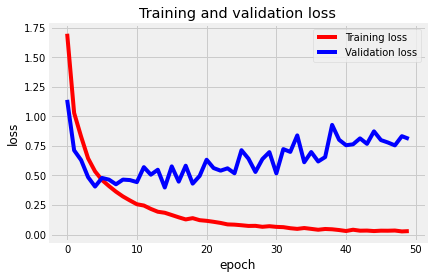

In [24]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [26]:
model.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 6ms/step - loss: 1.5284 - acc: 0.8000


[1.528390884399414, 0.800000011920929]

In [27]:
preds=np.round(model.predict(test_data),0)
print("round_test_data: ", preds)

round_test_data:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [33]:
ornament=["Band Rings","Couple Rings","God Pendant","Heart Rings","Initial Pendant","MangalSutra","Mens Rings","Pendant Set Stone","Stone Pendant","Stone Rings"]
classification_metrics=metrics.classification_report(test_labels,preds,target_names=ornament)
print(classification_metrics)

                   precision    recall  f1-score   support

       Band Rings       0.80      1.00      0.89         8
     Couple Rings       0.40      0.75      0.52         8
      God Pendant       1.00      0.75      0.86         8
      Heart Rings       1.00      0.62      0.77         8
  Initial Pendant       1.00      0.88      0.93         8
      MangalSutra       1.00      1.00      1.00         8
       Mens Rings       0.89      1.00      0.94         8
Pendant Set Stone       1.00      1.00      1.00         8
    Stone Pendant       0.80      1.00      0.89         8
      Stone Rings       0.00      0.00      0.00         8

        micro avg       0.81      0.80      0.81        80
        macro avg       0.79      0.80      0.78        80
     weighted avg       0.79      0.80      0.78        80
      samples avg       0.80      0.80      0.80        80



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import time

Loading and preprocessing image…
ID: 0, Label: Band Rings 0.0%
ID: 1, Label: Couple Rings 0.0%
ID: 2, Label: God Pendant 0.0%
ID: 3, Label: Heart Rings 0.0%
ID: 4, Label: Initial Pendant 0.0%
ID: 5, Label: MangalSutra 0.0%
ID: 6, Label: Mens Rings 100.0%
ID: 7, Label: Pendant Set Stone 0.0%
ID: 8, Label: Stone Pendant 0.0%
ID: 9, Label: Stone Rings 0.0%
Final Decision:
.
..
...
I am sure the below image is of ID: 6, Label: Mens Rings


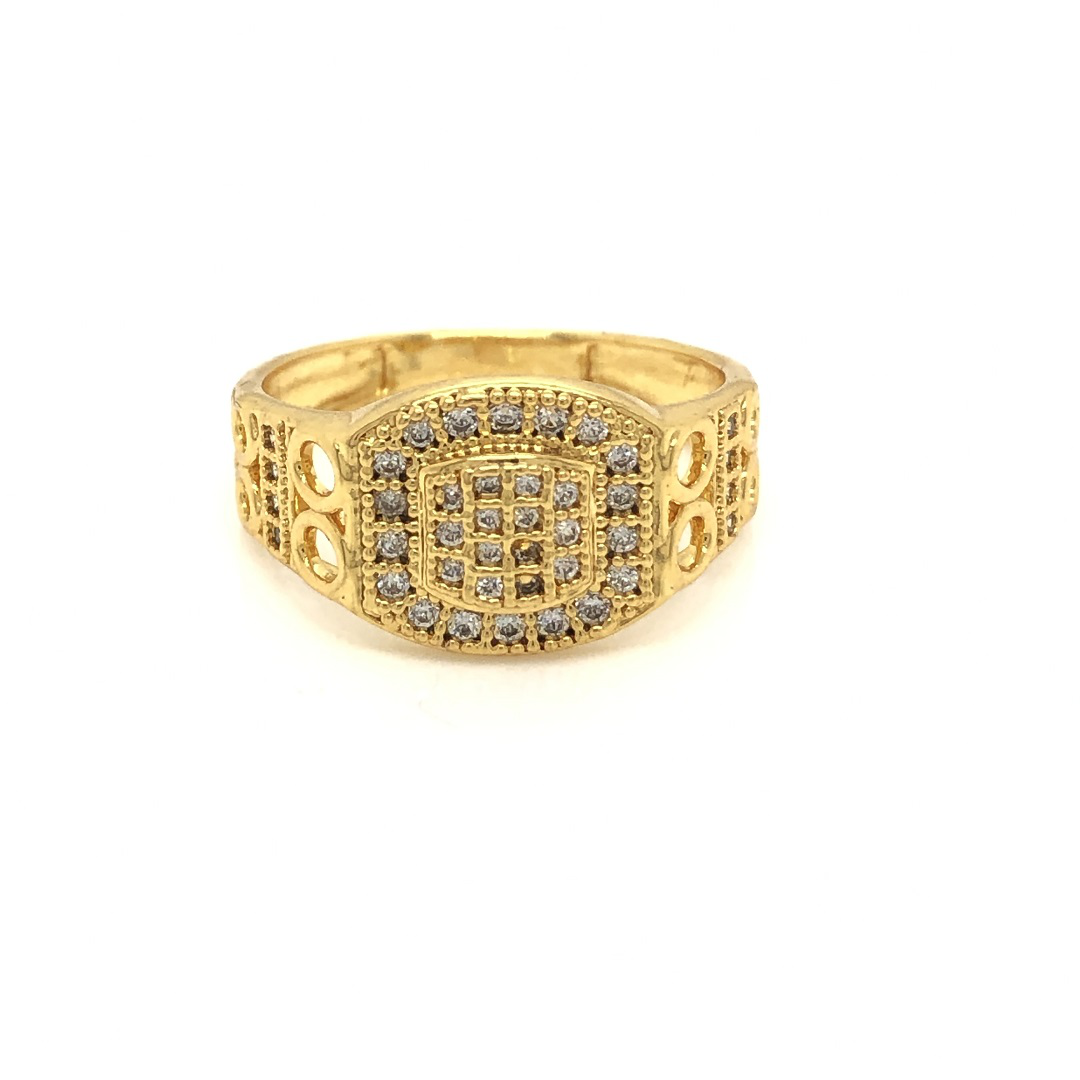

In [61]:
def read_image(file_path):
   print("Loading and preprocessing image…") 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image

def test_single_image(path):
  ornament=["Band Rings","Couple Rings","God Pendant","Heart Rings","Initial Pendant","MangalSutra","Mens Rings","Pendant Set Stone","Stone Pendant","Stone Rings"]
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = vgg16.predict(images) 
  preds = model.predict_proba(bt_prediction)
  for idx, ornament, x in zip(range(0,10), ornament , preds[0]):
   print("ID: {}, Label: {} {}%".format(idx, ornament, round(x*100,2) ))
  print('Final Decision:')
  time.sleep(.5)
  for x in range(3):
   print('.'*(x+1))
   time.sleep(.2)
  class_predicted = model.predict_classes(bt_prediction)
  class_dictionary = generator_top.class_indices 
  inv_map = {v: k for k, v in class_dictionary.items()} 
  print("I am sure the below image is of ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)

path = "/content/drive/My Drive/Naxbit/Temp/Test/Mens Rings/1.jpg"
test_single_image(path)

Loading and preprocessing image…
ID: 0, Label: Band Rings 0.0%
ID: 1, Label: Couple Rings 0.0%
ID: 2, Label: God Pendant 0.0%
ID: 3, Label: Heart Rings 0.0%
ID: 4, Label: Initial Pendant 0.0%
ID: 5, Label: MangalSutra 0.0%
ID: 6, Label: Mens Rings 0.0%
ID: 7, Label: Pendant Set Stone 100.0%
ID: 8, Label: Stone Pendant 0.0%
ID: 9, Label: Stone Rings 0.0%
Final Decision:
.
..
...
I am sure the below image is of ID: 7, Label: Pendant Set Stone


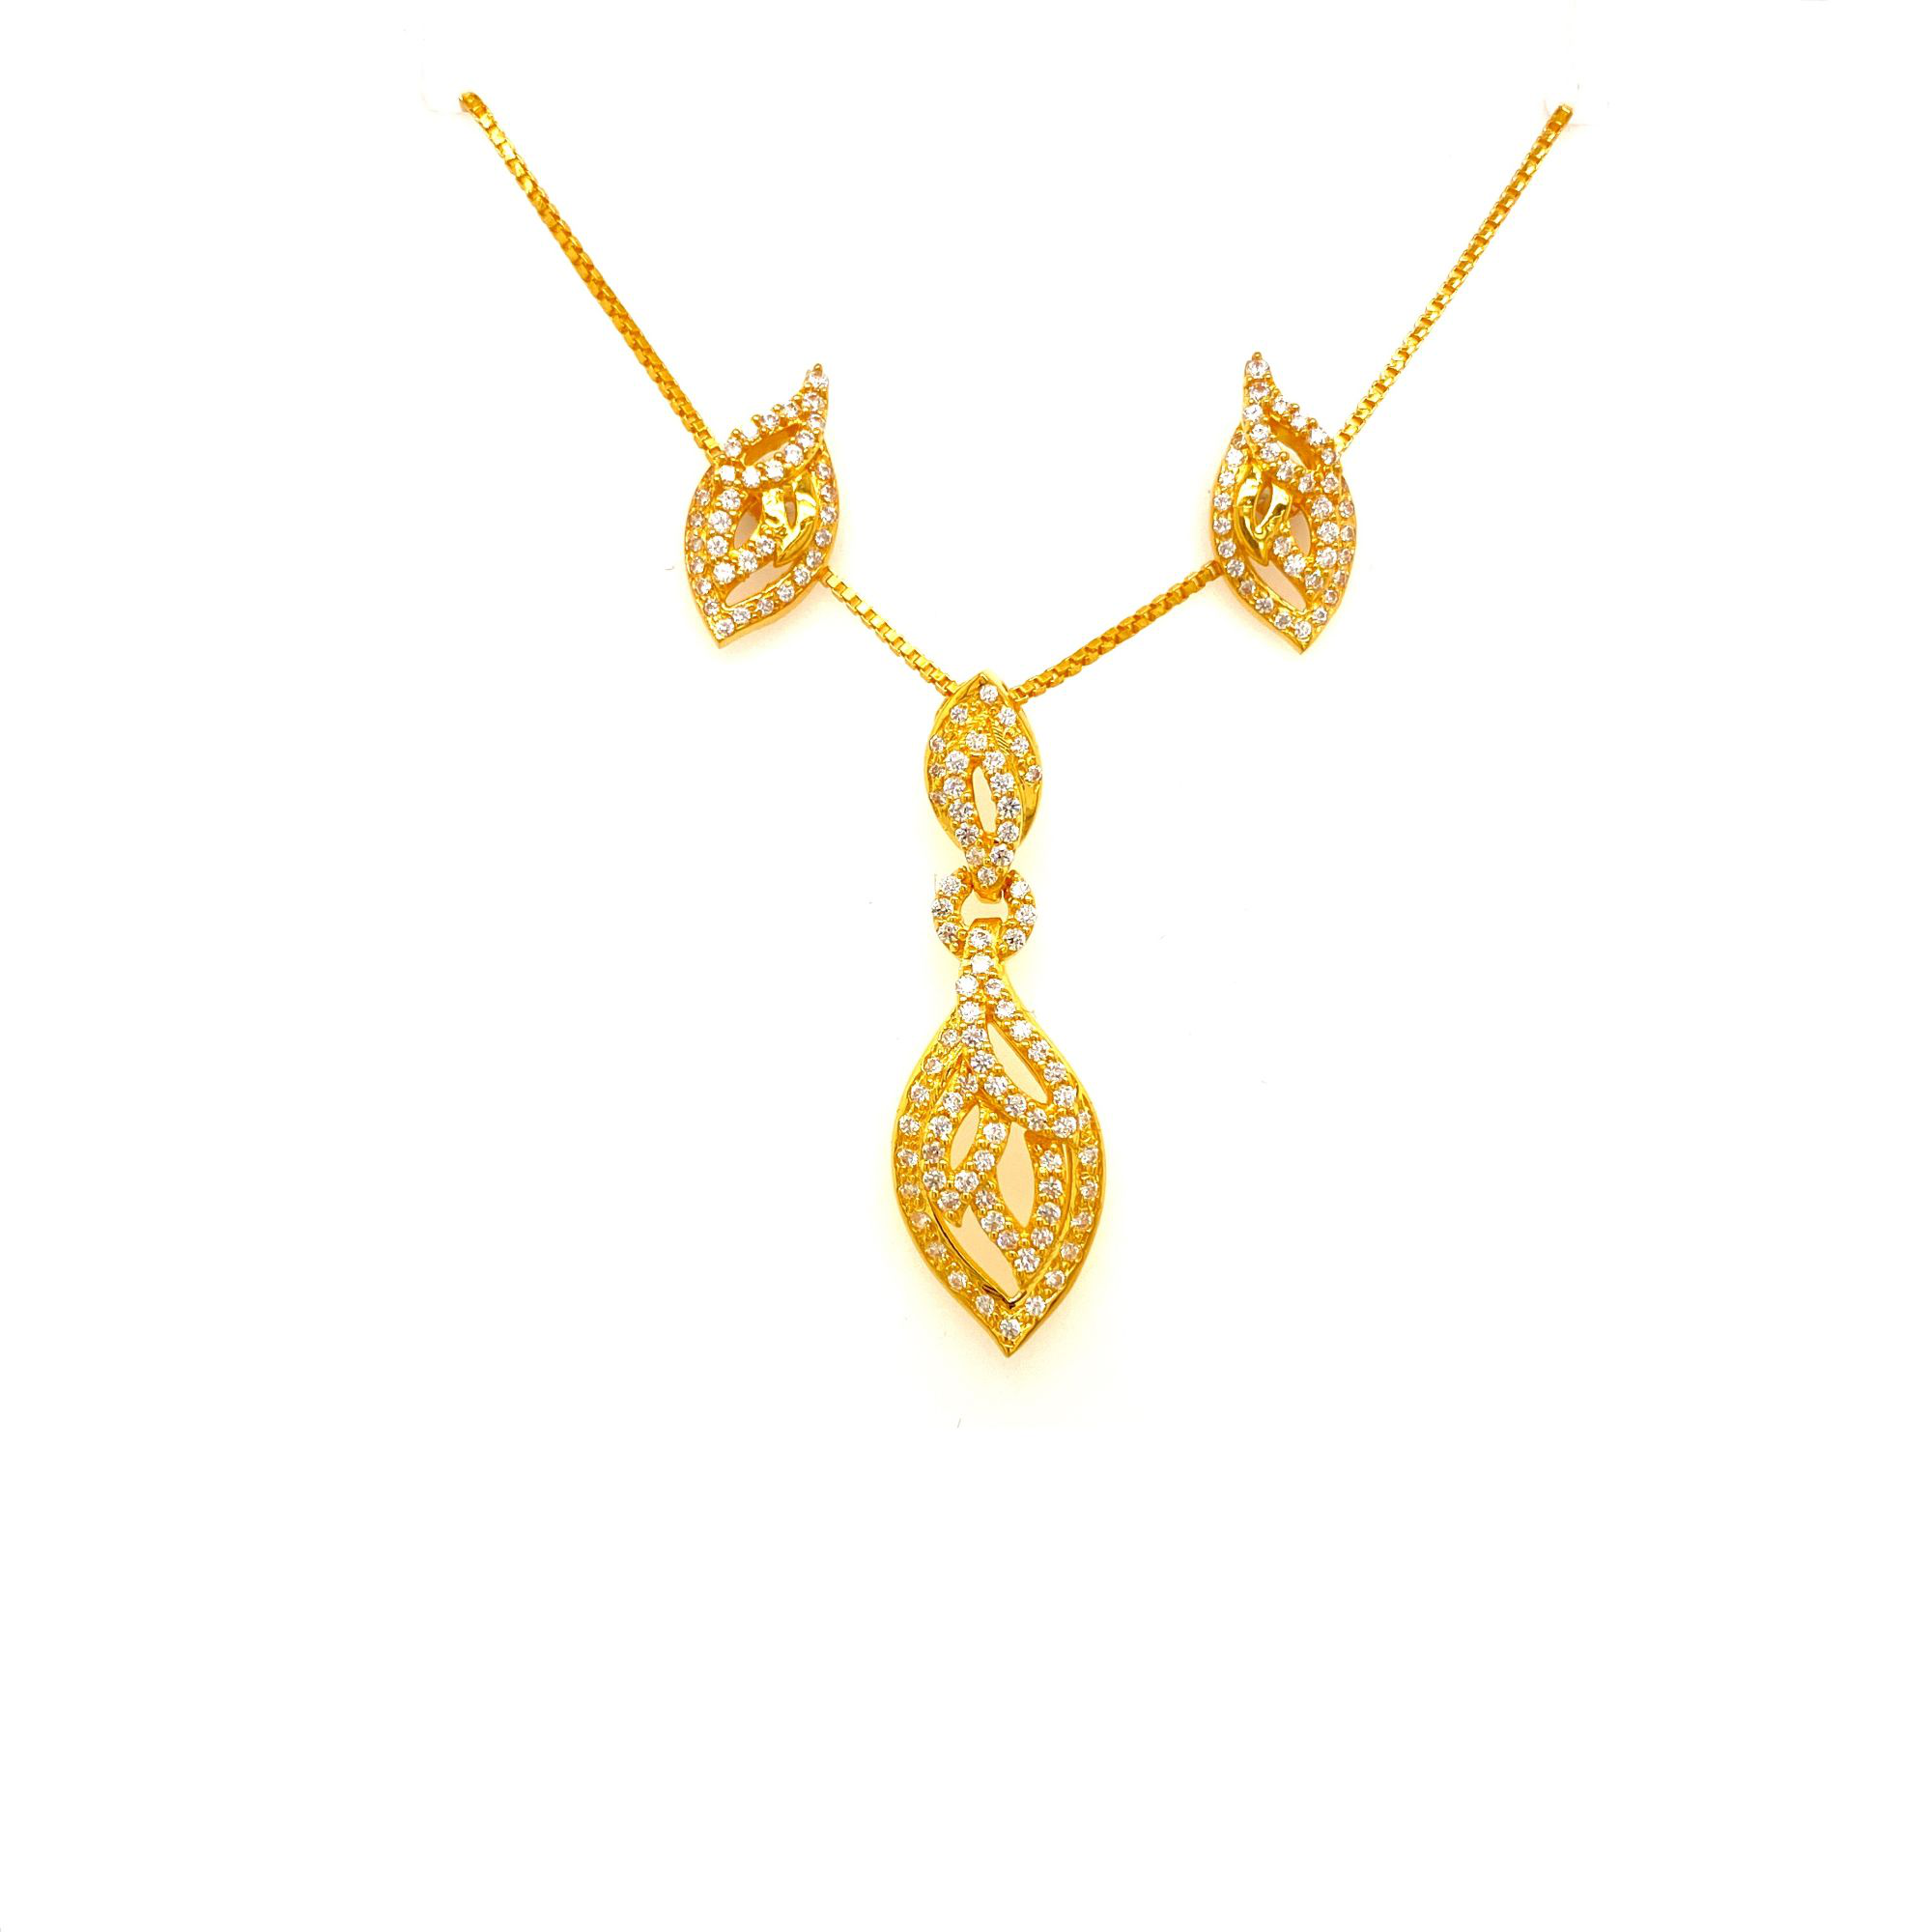

In [62]:
path = "/content/drive/My Drive/Naxbit/Temp/Test/Pendant Set Stone/191.jpg"
test_single_image(path)

Loading and preprocessing image…
ID: 0, Label: Band Rings 0.0%
ID: 1, Label: Couple Rings 0.0%
ID: 2, Label: God Pendant 0.0%
ID: 3, Label: Heart Rings 0.0%
ID: 4, Label: Initial Pendant 0.0%
ID: 5, Label: MangalSutra 100.0%
ID: 6, Label: Mens Rings 0.0%
ID: 7, Label: Pendant Set Stone 0.0%
ID: 8, Label: Stone Pendant 0.0%
ID: 9, Label: Stone Rings 0.0%
Final Decision:
.
..
...
I am sure the below image is of ID: 5, Label: MangalSutra


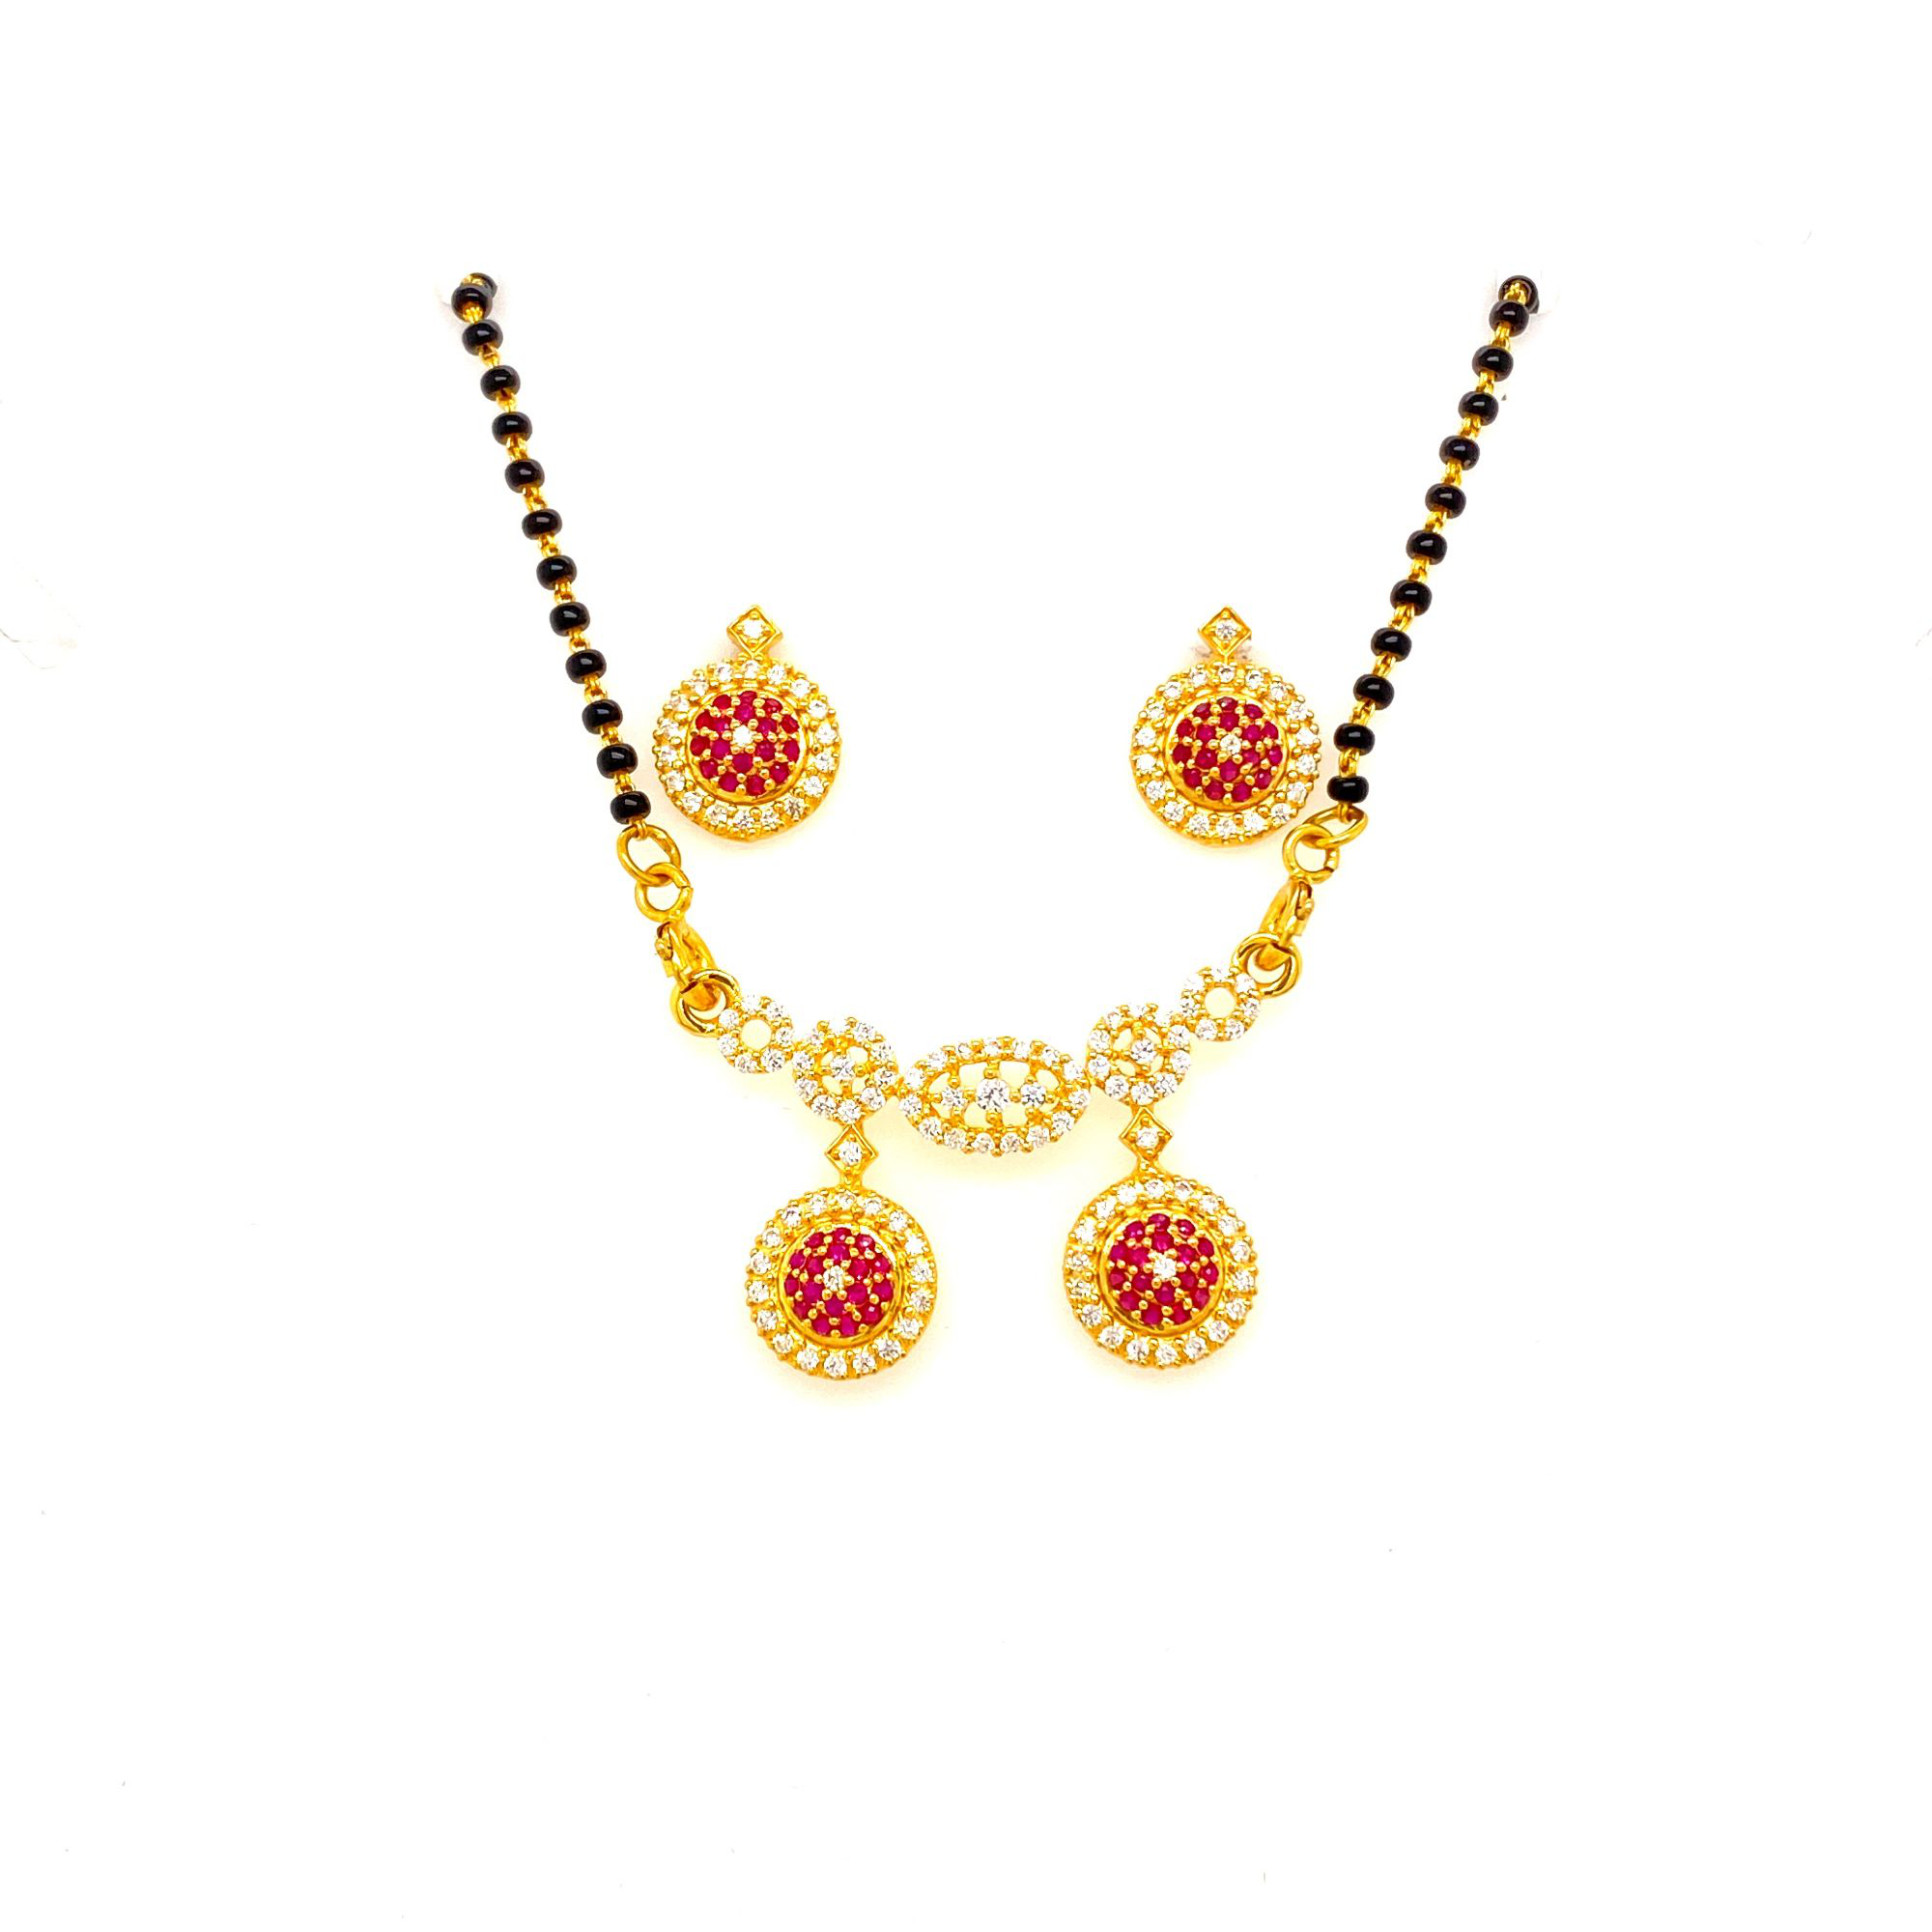

In [63]:
path = "/content/drive/My Drive/Naxbit/Temp/Test/MangalSutra/1.jpg"
test_single_image(path)

Loading and preprocessing image…
ID: 0, Label: Band Rings 0.02%
ID: 1, Label: Couple Rings 0.0%
ID: 2, Label: God Pendant 0.0%
ID: 3, Label: Heart Rings 0.01%
ID: 4, Label: Initial Pendant 99.7%
ID: 5, Label: MangalSutra 0.04%
ID: 6, Label: Mens Rings 0.13%
ID: 7, Label: Pendant Set Stone 0.03%
ID: 8, Label: Stone Pendant 0.05%
ID: 9, Label: Stone Rings 0.02%
Final Decision:
.
..
...
I am sure the below image is of ID: 4, Label: Initial Pendant


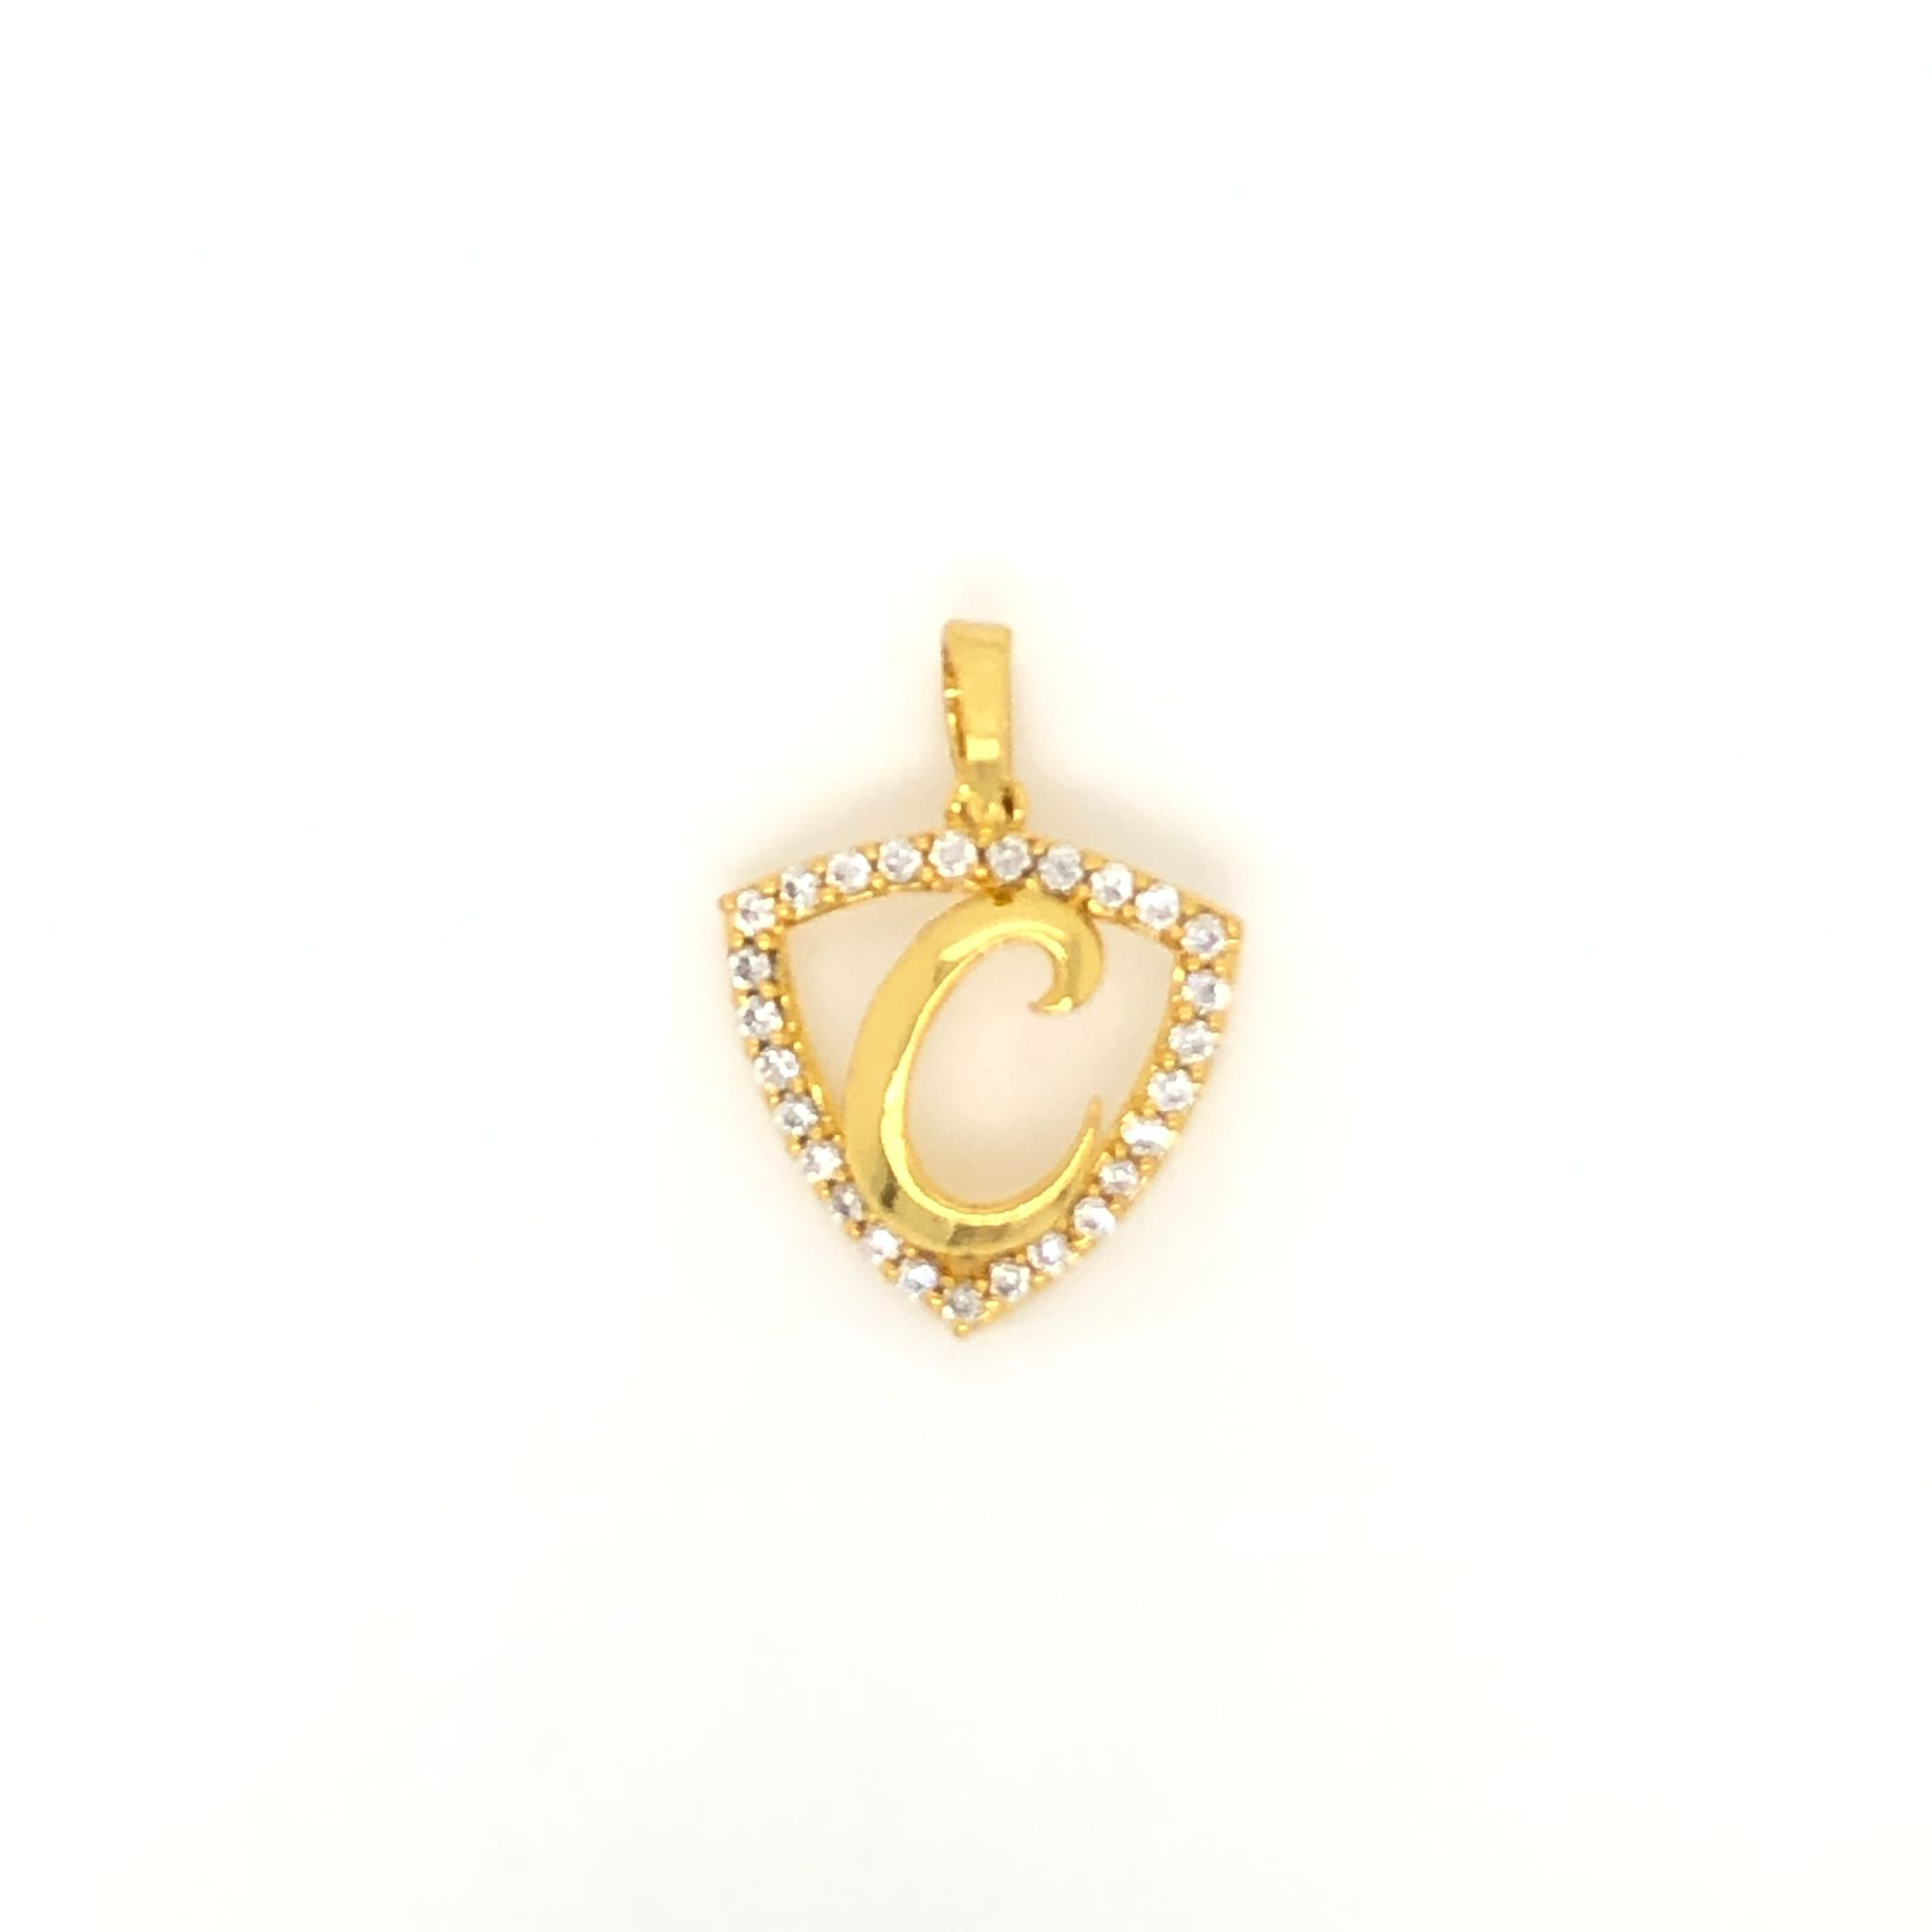

In [64]:
path = "/content/drive/My Drive/Naxbit/Temp/Test/Initial Pendant/1.jpg"
test_single_image(path)